# 3D printing

Splipy allows for the cration and manipulation of smooth 3D objects. Sadly matplotlib is very bad at showing 3D figures, so it is encouraged to download [Meshlab](https://www.meshlab.net/) to view the resulting files.

3D printing software typically supports `.stl`-files which can be extracted as a triangulation of smooth spline objects. We will here save files in this format so they can be exported most easily to printing software

## The trefoil knot

We will here try to create a printable `.stl` file of the [trefoil knot](https://en.wikipedia.org/wiki/Trefoil_knot).

<img width="33%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Tricoloring.png/1280px-Tricoloring.png">

In [1]:
%matplotlib notebook

In [2]:
from splipy import curve_factory, surface_factory
from splipy.io import STL, SVG
from numpy import pi, cos, sin
import numpy as np

# Create a few plotting functions

These are the same as the ones from tutorial "03: Factory methods"

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_2D_curve(curve, show_controlpoints=False):
    t = np.linspace(curve.start(0), curve.end(0), 150)
    x = curve(t)
    plt.plot(x[:,0], x[:,1])
    if(show_controlpoints):
        controlpoints = np.array([cp[:-1] / cp[-1] if curve.rational else cp for cp in curve[:]])
        plt.plot(controlpoints[:,0], controlpoints[:,1], 'rs-')
        if curve.periodic():
            i = [0,-1]
            plt.plot(controlpoints[i,0], controlpoints[i,1], 'r-')
            
        plt.legend(['Curve', 'Controlpoints'], loc='upper left')

    plt.axis('equal')
    plt.show()
    
def plot_2D_surface(surface):
    u = np.linspace(surface.start('u'), surface.end('u'), 30)
    v = np.linspace(surface.start('v'), surface.end('v'), 30)
    x = surface(u,v)
    plt.plot(x[:,:,0],   x[:,:,1],   'k-')
    plt.plot(x[:,:,0].T, x[:,:,1].T, 'k-')
    plt.axis('equal')
    plt.show()

def plot_3D_curve(curve):
    t = np.linspace(curve.start(0), curve.end(0), 150)
    x = curve(t)
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x[:,0], x[:,1], x[:,2])
    plt.show()
    
def plot_3D_surface(surface):
    u = np.linspace(surface.start('u'), surface.end('u'), 30)
    v = np.linspace(surface.start('v'), surface.end('v'), 30)
    x = surface(u,v)
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(  x[:,:,0], x[:,:,1], x[:,:,2])
    ax.plot_wireframe(x[:,:,0], x[:,:,1], x[:,:,2], edgecolor='k', linewidth=1)
    plt.show()

def plot_3D_volumes(volume):
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    for face in volume.edges():
        u = np.linspace(face.start('u'), face.end('u'), 30)
        v = np.linspace(face.start('v'), face.end('v'), 30)
        x = face(u,v)
        ax.plot_surface(  x[:,:,0], x[:,:,1], x[:,:,2])
        ax.plot_wireframe(x[:,:,0], x[:,:,1], x[:,:,2], edgecolor='k', linewidth=1)
    plt.show()
    


<IPython.core.display.Javascript object>


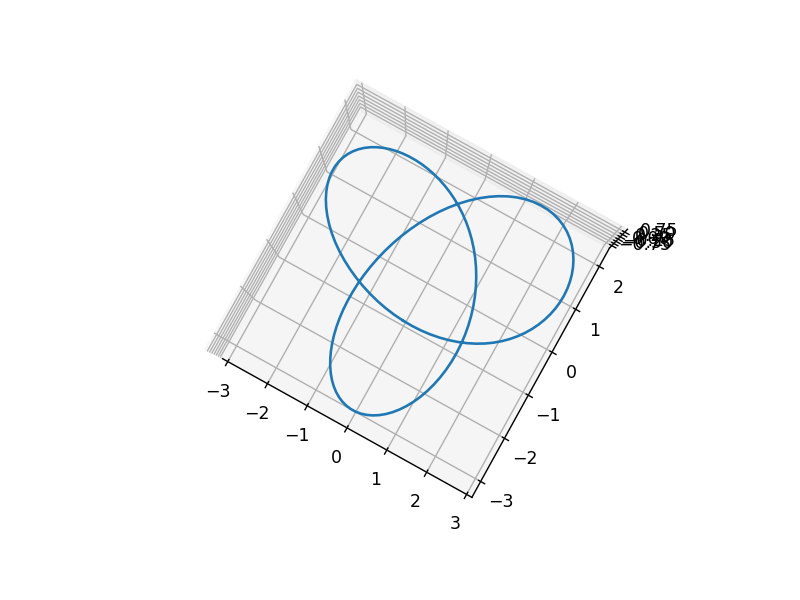

In [4]:
### create a parametric 3D-function
def trefoil(t):
    t = np.array(t)
    return np.array([sin(t) + 2*sin(2*t), cos(t) - 2*cos(2*t), -sin(3*t)]).T

### do an adaptive best cubic spline-fit of this function
path  = curve_factory.fit(trefoil, 0, 2*pi)

### since we know it is a closed curve, enforce this on the path
path  = path.make_periodic(0,0)

plot_3D_curve(path)

<IPython.core.display.Javascript object>


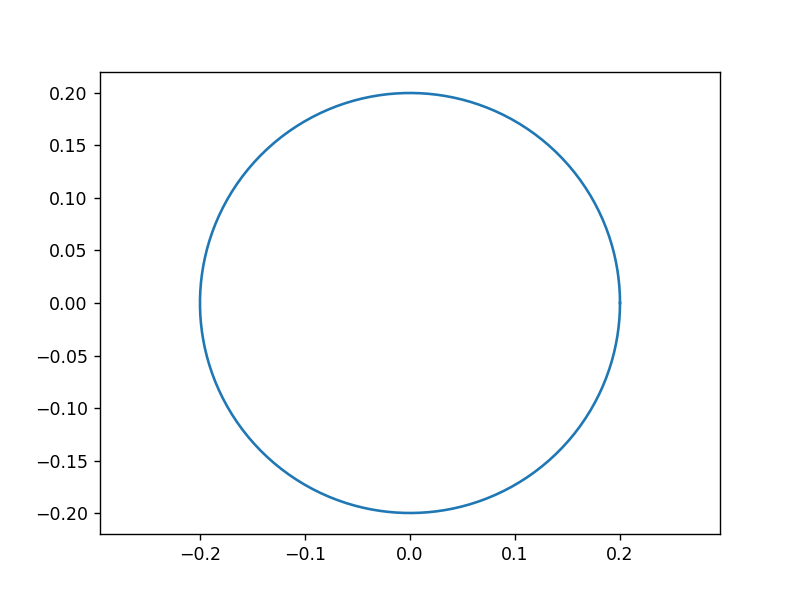

In [5]:
### create a sweeping curve (uncomment your favorite)

## circle
shape = curve_factory.circle(r=0.2)

## square
# shape = 0.16*curve_factory.n_gon(4)

## star
# shape = 0.16*curve_factory.n_gon(10) # a star
# shape[::2] *= .4

plot_2D_curve(shape)

<IPython.core.display.Javascript object>


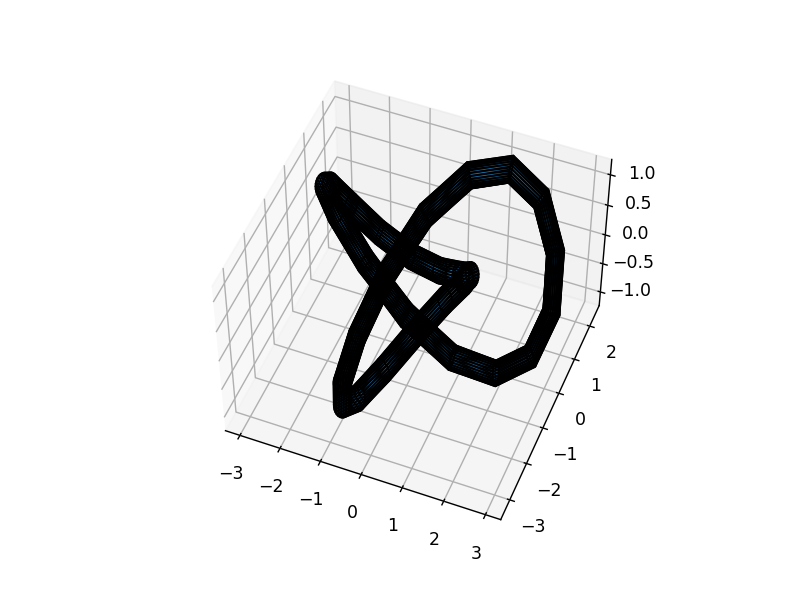

In [6]:
### sweep *shape along *path
srf = surface_factory.sweep(path, shape)

plot_3D_surface(srf)

### write results to file. Use meshlab (www.meshlab.net) to view stl-files
with STL('trefoil.stl') as f:
    f.write(srf, n=(150,30))

Now open the file `trefoil.stl` in suitable stl visualizer such as meshlab since matplotlib has pretty bad 3D plotting capabilities. Note that for complex shapes, you can draw these in  [inkscape](https://inkscape.org/) and store this as an `.svg` file.

# Revolve

Reolve involves spinning a curve around a center axis. We here use a predefined curve, but encourage you to try this with your own curves.

In [7]:
### read input vector (svg) curve drawn in inkscape
with SVG('half_wine_glass.svg') as f:
    list_of_all_curves = f.read()

# Since files can include more than one curve, this is always returned as a list. We here know that there is only a single curve
curve = list_of_all_curves[0]
print(curve)

p=4, [  0.           0.           0.           0.          14.64235853
  14.64235853  14.64235853  29.28471706  29.28471706  29.28471706
  43.92707559  43.92707559  43.92707559  58.56943411  58.56943411
  58.56943411  73.21179264  73.21179264  73.21179264  87.85415117
  87.85415117  87.85415117 102.4965097  102.4965097  102.4965097
 110.4340107  110.4340107  110.4340107  110.4340107 ]
[[ 95.25       180.58333   ]
 [ 95.25       180.58333   ]
 [103.1875     177.9375    ]
 [105.83333    180.58333   ]
 [108.47917    183.22917   ]
 [108.47917    199.104168  ]
 [111.125      199.104168  ]
 [113.77083    199.104168  ]
 [111.125      177.9375    ]
 [108.47917    175.29167   ]
 [105.83333    172.64583   ]
 [103.1875     175.29167   ]
 [100.54167    172.64583   ]
 [ 97.895832   170.        ]
 [ 95.249999   148.83334   ]
 [ 97.895832   146.1875    ]
 [100.54167    143.54167   ]
 [100.54167    146.1875    ]
 [103.1875     143.54167   ]
 [105.83333    140.89584   ]
 [105.83333    140.89584   ]
 [1

<IPython.core.display.Javascript object>


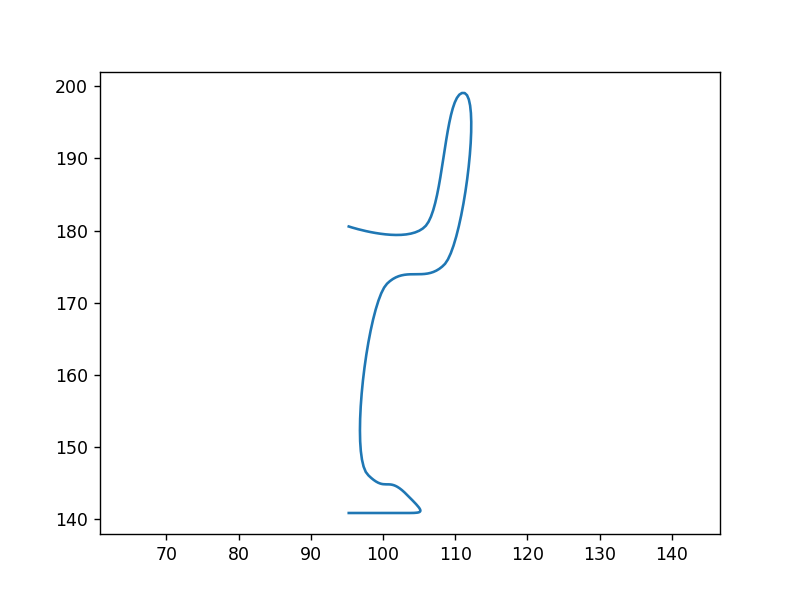

In [8]:
plot_2D_curve(curve)

note that this has rather arbitrary coordinates (lying around x=110). We center this at the origin so we can revolve it around one of the axis



<IPython.core.display.Javascript object>


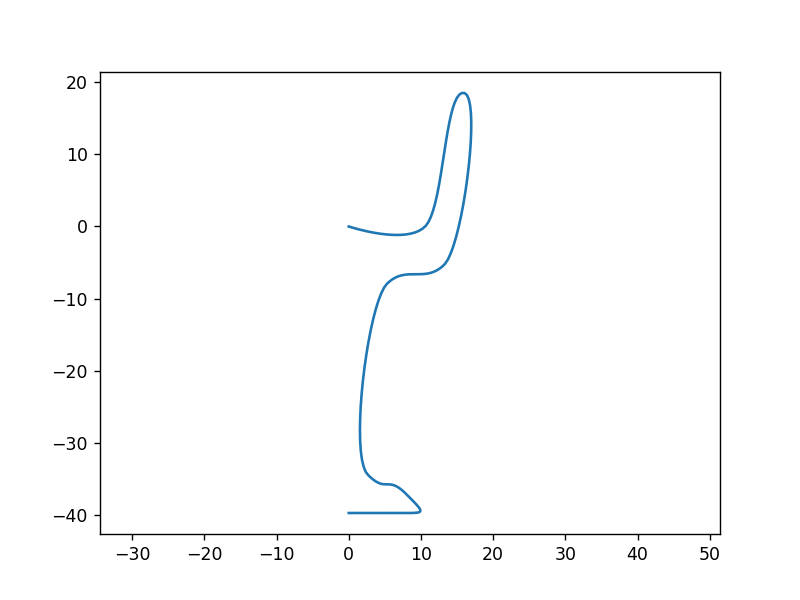

In [9]:
curve -= curve[0] # this will place the first controlpoints (curve start) at the point (0,0)
plot_2D_curve(curve)

<IPython.core.display.Javascript object>


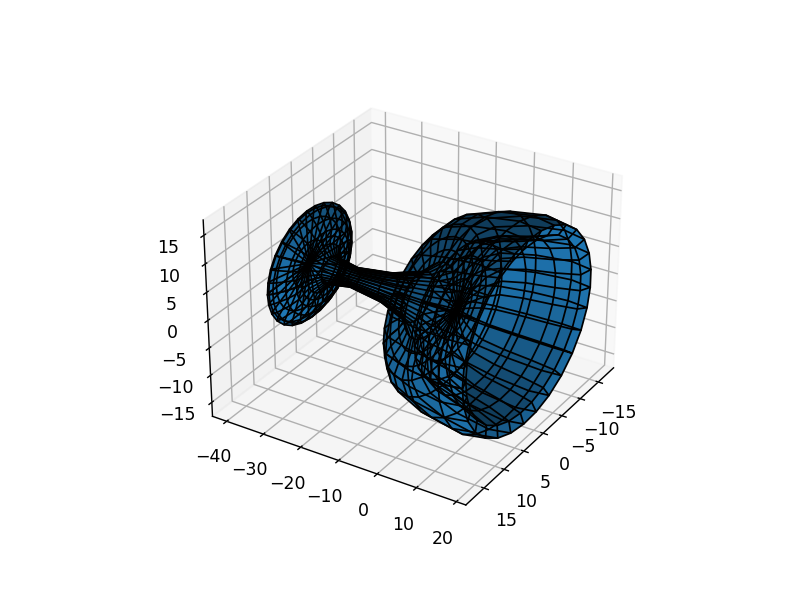

In [10]:
curve -= curve[0,:]
cup = surface_factory.revolve(curve, axis=[0,1,0])

plot_3D_surface(cup)

In [11]:
cup = cup.swap()
### write results to file. Use meshlab (www.meshlab.net) to view stl-files
with STL('cup.stl') as f:
    f.write(cup, n=(40,150))

## Question 1:

Draw some interesting shape in inkscape and use this for either sweep or revolve operations